# Poincare Map

In [36]:
import rebound
import numpy as np
import math

In [88]:
def ydot(x,y,vx,Cj,mu1,mu2):
    r1 = math.sqrt((x+mu2)*(x+mu2) + y*y)
    r2 = math.sqrt((x-mu1)*(x-mu1) + y*y)
    print -Cj*0.5 + (x*x+y*y) + 2.*(mu1/r1 + mu2/r2)
    vy = np.sqrt(-Cj + (x*x+y*y) + 2.*(mu1/r1 + mu2/r2) - vx*vx)
    return vy
def hyper(sim):
    return sim.particles[1].y

In [106]:
N_points_max = 1000
N_points = 0
poincare_map = np.zeros((N_points_max,2))

while N_points <N_points_max:

    sim = rebound.Simulation()
    sim.integrator = "ias15"
    mu1 = 1./(1.+1e-3)
    mu2 = 1e-3/(1.+1e-3)
    sim.add(m=1.-1e-3)
    
    x = 0.55
    y = 0.
    vx = 0.
    vy = ydot(x, y, vx, 3.07, mu1, mu2)
    sim.add(m=0, a=0.6944, e=0.2065)
    print sim.particles[1]
    print sim.calculate_orbits()[0]
    sim.add(m=1e-3, a=1.)
    sim.move_to_com()
    dt = 0.3
    dt_epsilon = 0.0001
    sign = hyper(sim)
    while sim.t<10000. and N_points < N_points_max:
        oldt = sim.t
        olddt = sim.dt
        sim.integrate(oldt+dt)
        nsign = hyper(sim)
        if sign*nsign < 0.:
            leftt = oldt
            rightt = sim.t
            sim.dt = -olddt
            while (rightt-leftt > dt_epsilon):
                midt = (leftt+rightt)/2.
                print midt, sim.t, sim.dt
                sim.integrate(midt, exact_finish_time=1)
                msign = hyper(sim)
                print msign
                if msign*sign < 0.:
                    leftt = midt
                    sim.dt = olddt
                else:
                    rightt = midt
                    sim.dt = -olddt
            #orbits = sim.calculate_orbits()
            #poincare_map[N_points] = [orbits[0].a, orbits[0].e]
            p = sim.particles[1]
            print p.y, hyper(sim)
            if p.vy>0.:
                poincare_map[N_points] = [p.x,p.vx]
                N_points += 1
            sim.dt = olddt
        sign = nsign

2.39809438505
<rebound.Particle object, id=-1 m=0.0 x=0.5510064 y=0.0 z=0.0 vx=0.0 vy=1.47899969898 vz=0.0>
<rebound.Orbit instance, a=0.6944 e=0.2065>
1.77887344466 1.94052200242 -0.0769340775451
0.114501335768
1.69804916578 1.69796968281 -0.0769340775451
0.114501335768
1.65763702634 1.69796968281 -0.0769340775451
0.187908610012
1.63743095662 1.62103560527 -0.0769340775451
0.187908610012
1.62732792176 1.62103560527 -0.0769340775451
0.187908610012
1.62227640433 1.62103560527 -0.0769340775451
0.187908610012
1.61975064562 1.62103560527 -0.0769340775451
0.259362399055
1.61848776626 1.54410152772 -0.0769340775451
0.259362399055
1.61785632658 1.54410152772 -0.0769340775451
0.259362399055
1.61754060674 1.54410152772 -0.0769340775451
0.259362399055
1.61738274682 1.54410152772 -0.0769340775451
0.259362399055
1.61730381686 1.54410152772 -0.0769340775451
0.259362399055
0.259362399055 0.259362399055
3.60076654374 3.75948464755 -0.032450568318
-0.034478343387
3.52140749183 3.60002091635 -0.0324505

Plot

3589.42091446


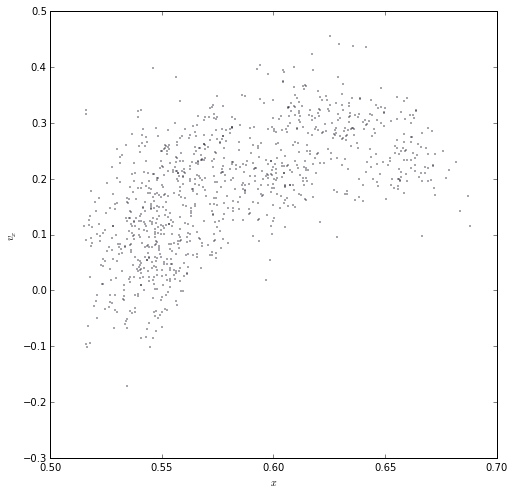

In [103]:
%matplotlib inline
pm_x = poincare_map[:,0]
pm_y = poincare_map[:,1]
if 0:
    pm_maskedx = np.ma.masked_where(pm_x>0., pm_x)
    pm_maskedy = np.ma.masked_where(pm_x>0., pm_y)
else:
    pm_maskedx = pm_x
    pm_maskedy = pm_y

    
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.set_xlabel("$x$")
ax.set_ylabel("$v_x$")
plt.scatter(pm_maskedx,pm_maskedy,marker=".",s=1.,alpha=.81)
print sim.t